In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns

plt.style.use("ggplot")

# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'

dtcol = 'data_date'
seccol = 'security_id'

In [3]:
csv_gz_files = ['new_processed_csvs/new_data_1.csv.gz',
                'new_processed_csvs/new_data_2.csv.gz', 
                'new_processed_csvs/new_data_3.csv.gz', 
                'new_processed_csvs/new_data_4.csv.gz',
                'new_processed_csvs/new_data_5.csv.gz', 
                'new_processed_csvs/new_data_6.csv.gz', 
                'new_processed_csvs/new_data_7.csv.gz', 
                'new_processed_csvs/new_data_8.csv.gz', 
                'new_processed_csvs/new_data_9.csv.gz', 
                'new_processed_csvs/new_data_10.csv.gz', 
                'new_processed_csvs/new_data_11.csv.gz']

trd_dates_file = 'new_processed_csvs/new_trd_dates.csv.gz'

rsch_universe_file = 'new_processed_csvs/new_rsch_universe.csv.gz'

csv_list = []

In [ ]:
for single_csv in csv_gz_files:
    print(f"Processing computed file '{single_csv}' ")
    tmp_df = pd.read_csv(os.path.join(data_root, single_csv), parse_dates=[dtcol], dtype={seccol: str}, compression='gzip')
    assert not tmp_df.duplicated(subset=[dtcol, seccol]).any()
    csv_list.append(tmp_df)

In [ ]:
all_sigs = reduce(lambda x, y: pd.merge(x, y, on=[dtcol, seccol], how='outer'), csv_list)

In [ ]:
all_sigs.sort_values(by=[dtcol, seccol], inplace=True)

In [ ]:
print(all_sigs.head(), '\n')
print(all_sigs.tail(), '\n')
print(all_sigs.sample(5), '\n')

In [ ]:
# Load Trd Dates
trd_dates = pd.read_csv(os.path.join(data_root, trd_dates_file), 
                       parse_dates=['data_date', 'pos_date', 'ret_date'])
print(trd_dates.head(), '\n')
print(trd_dates.tail(), '\n')
print(trd_dates.shape)

In [4]:
# Load Research Universe Data
rsch_universe = pd.read_csv(os.path.join(data_root, rsch_universe_file), 
                            usecols=['data_date', 'security_id', 'close_price', 'volume', 'in_trading_universe',
                                     'ret1d', 'sector', 'clip_trisk'], 
                            parse_dates=['data_date'], dtype={'security_id': str})
print(rsch_universe.head(), '\n')
print(rsch_universe.tail(), '\n')
print(rsch_universe.shape)

   data_date security_id  close_price   volume in_trading_universe     ret1d  \
0 2010-01-04     1000201        10.15   130339                   N  0.031504   
1 2010-01-04     1004601         1.55  1563087                   N  0.054421   
2 2010-01-04      100701        37.00   192260                   Y  0.014532   
3 2010-01-04     1007201        33.78   642910                   Y  0.016857   
4 2010-01-04     1009601        47.53    66006                   N  0.019957   

                   sector  clip_trisk  
0  Consumer Discretionary         NaN  
1  Information Technology         NaN  
2               Utilities         NaN  
3  Consumer Discretionary         NaN  
4        Consumer Staples         NaN   

         data_date security_id  close_price   volume in_trading_universe  \
5927170 2017-12-29      985601        26.22  1805151                   Y   
5927171 2017-12-29     9931801         2.62   637247                   N   
5927172 2017-12-29      995201        78.82   495

In [ ]:
df = all_sigs.merge(trd_dates)

print(df.head(), '\n')
print(df.tail())

In [ ]:
ncount = df.groupby(dtcol).apply(
    lambda x: pd.Series([x['d1'].notnull().sum(), x['d2'].notnull().sum(), x['d3'].notnull().sum(),
                         x['d4'].notnull().sum(), x['d5'].notnull().sum(), x['d6'].notnull().sum(),
                         x['d7'].notnull().sum(), x['d8'].notnull().sum(), x['d9'].notnull().sum(),
                         x['d10'].notnull().sum(), x['d11'].notnull().sum(), x.shape[0]],
                        index=['ds1_nber', 'ds2_nber', 'ds3_nber', 'ds4_nber', 
                               'ds5_nber', 'ds6_nber', 'ds7_nber', 'ds8_nber', 
                               'ds9_nber', 'ds10_nber', 'ds11_nber', 'total_nber']))

In [ ]:
# ncount = df.groupby('data_date').apply(
#     lambda x: pd.Series([x['d8'].notnull().sum(), x['d9_adj'].notnull().sum(), 
#                          x['d10'].notnull().sum(), x['d11'].notnull().sum(), x.shape[0]],
#                         index=['#Valid_d8', '#Valid_d9_adj', '#Valid_d10', '#Valid_d11', '#Total']))

In [ ]:
ncount.plot()

In [ ]:
x_cols = [col for col in df.columns if col not in ['data_date', 'security_id', 'pos_date', 'ret_date']]
print(x_cols)

In [ ]:
corrmat = df[x_cols].corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title("Raw data spearman rank correlation")
plt.show()


In [ ]:
df.describe()

In [ ]:
df.sample(10)

In [ ]:
# df.to_csv(os.path.join(data_root, 'combined_8_9_10_11.csv.gz'), compression='gzip')

In [ ]:
rsch_universe.head()

In [ ]:
known_df_on_data_date = df.merge(rsch_universe[['data_date', 'security_id', 'ret1d']].rename(
    columns={'data_date': 'ret_date', 'ret1d': 'fwdret_f1'}))

In [ ]:
known_df_on_data_date.tail()

In [ ]:
rsch_universe.loc[(rsch_universe['data_date'] == '2017-12-29') & (rsch_universe['security_id'] == '996501')]

In [ ]:
## Now look at the correlation of each of those variables
x_cols = [col for col in known_df_on_data_date.columns if 
          col not in ['data_date', 'security_id', 'pos_date', 'ret_date', 'fwdret_f1']]
print(x_cols)

In [ ]:
### Spearman Rank Correlation 
import matplotlib.pyplot as plt
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(known_df_on_data_date[[col, 'fwdret_f1']].corr(method='spearman').iloc[0, 1])

In [ ]:
## Looks like the prediction power of d9 is the best 
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(10, 5))
rects = ax.barh(ind, np.array(values), color='r')
ax.set_yticks(ind + (width / 2.0))
ax.set_yticklabels(labels, rotation='horizontal')
# ax.set_yticklabels(rotation='45')
ax.set_xlabel("Correlation coefficient")

In [ ]:
known_df_on_data_date['d2'].hist(bins=100)

In [ ]:
known_df_on_data_date.head()

In [ ]:
"""
pos_date is used to carry close_price as trade_price
data_date is used to compute trisk and volume 
"""
known_df_on_data_date = known_df_on_data_date.merge(
    rsch_universe[['data_date', 'security_id', 'close_price']].rename(columns={'data_date': 'pos_date', 
                                                                               'close_price': 'trd_price'}))

In [ ]:
print(known_df_on_data_date.head())

In [ ]:
rsch_universe.head()

In [ ]:
print(known_df_on_data_date.dtypes)

print(rsch_universe.dtypes)

assert not known_df_on_data_date.duplicated(subset=[dtcol, seccol]).any()
assert not rsch_universe.duplicated(subset=[dtcol, seccol]).any()

In [ ]:
known_df_on_data_date.groupby(dtcol).size().plot()
rsch_universe.groupby(dtcol).size().plot()
plt.legend(['known_df_on_data_date', 'rsch_universe'], loc='upper left')
plt.title('#Stocks')

In [8]:
known_df_on_data_date = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/tmp1.csv.gz'), 
                                    parse_dates=['data_date'], dtype={'security_id': str},
                                    compression='gzip')

In [9]:
combined_df = known_df_on_data_date.merge(
    rsch_universe[['data_date', 'security_id', 'volume', 'in_trading_universe', 'sector', 'clip_trisk']],
    on=['data_date', 'security_id'],
    how='inner')

In [13]:
print(combined_df.head(), '\n')
print(combined_df.tail(), '\n')
print(combined_df.shape, '\n')
print(combined_df.dtypes)

   data_date security_id  d1  d2  d3  d4  d5  d6  d7        d8  ...   d10  \
0 2010-01-04     1000201 NaN NaN NaN NaN NaN NaN NaN       NaN  ...  13.0   
1 2010-01-04     1004601 NaN NaN NaN NaN NaN NaN NaN  138000.0  ...   NaN   
2 2010-01-04      100701 NaN NaN NaN NaN NaN NaN NaN  131927.0  ...   NaN   
3 2010-01-04     1007201 NaN NaN NaN NaN NaN NaN NaN    1990.0  ...   NaN   
4 2010-01-04     1009601 NaN NaN NaN NaN NaN NaN NaN   51393.0  ...  16.0   

        d11    pos_date    ret_date fwdret_f1  trd_price   volume  \
0  44.71284  2010-01-05  2010-01-06  0.061447      10.09   130339   
1       NaN  2010-01-05  2010-01-06 -0.018519       1.62  1563087   
2       NaN  2010-01-05  2010-01-06 -0.015715      36.27   192260   
3       NaN  2010-01-05  2010-01-06  0.036733      35.39   642910   
4  63.83814  2010-01-05  2010-01-06 -0.011088      47.80    66006   

   in_trading_universe                  sector clip_trisk  
0                    N  Consumer Discretionary        NaN  
1 

In [14]:
combined_df.to_csv(os.path.join(data_root, 'new_processed_csvs/new_known_df_on_data_date.csv.gz'), 
                   index=False, compression='gzip')

<AxesSubplot:xlabel='data_date'>

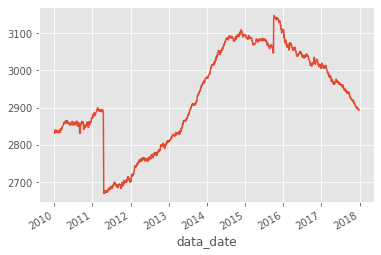

In [15]:
combined_df.groupby(dtcol).size().plot()